# Campaign Finance Capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Files

In [2]:
sen_2016 = pd.read_csv('../data/2016-SEN.csv')
sen_2014 = pd.read_csv('../data/2014-SEN.csv')
sen_2012 = pd.read_csv('../data/2012-SEN.csv')
sen_2010 = pd.read_csv('../data/2010-SEN.csv')

### Pre-processing

In [3]:
def clean_df(df):
    df['first_last_party'] = [full_name[:-4] for full_name in df['first_last_party']]
    df['dist_id_run_for'] = [office[:2] for office in df['dist_id_run_for']]
    df['recip_code'] = [code[-1] for code in df['recip_code']]
    df.rename(columns={'first_last_party':'candidate_name', 'dist_id_run_for':'state_run_for'}, inplace=True)
    df['date_donated'] = pd.to_datetime(df['date_donated'])
    return df

In [4]:
# Pre-process datasets
sen_2016 = clean_df(sen_2016)
sen_2014 = clean_df(sen_2014)
sen_2012 = clean_df(sen_2012)
sen_2010 = clean_df(sen_2010)

In [5]:
def add_commas(number):
    n = str(number)
    
    if len(n)>6:
        return n[:-6]+','+n[-6:-3]+','+n[-3:]
    elif len(n)>3:
        return n[:-3]+','+n[-3:]
    else:
        return number

In [6]:
print(f"2016 Sen - {add_commas(sen_2016.shape[0])} records")
print(f"2014 Sen - {add_commas(sen_2014.shape[0])} records")
print(f"2012 Sen - {add_commas(sen_2012.shape[0])} records")
print(f"2010 Sen - {add_commas(sen_2010.shape[0])} records")

2016 Sen - 800,621 records
2014 Sen - 2,232,686 records
2012 Sen - 3,426,346 records
2010 Sen - 4,261,836 records


## EDA

In [7]:
sen_2014.tail()

,date_donated,cycle,candidate_name,party,state_run_for,recip_code,raised_total,org_name,employer,ult_org,type,gender,city,state,amount
2232681,2013-11-27,2014,Jeff Merkley,D,OR,W,7913431,[24T Contribution],THE URBAN INSTITUTE,NaN,24T,F,SILVER SPRING,MD,500
2232682,2013-11-27,2014,Jeff Merkley,D,OR,I,454726,[24T Contribution],THE URBAN INSTITUTE,NaN,24T,F,SILVER SPRING,MD,500
2232683,2013-11-27,2014,Jeff Merkley,D,OR,W,7762872,[24T Contribution],THE URBAN INSTITUTE,NaN,24T,F,SILVER SPRING,MD,500
2232684,2013-06-30,2014,Ann Kirkpatrick,D,AZ,C,1476839,[24I Contribution],NaN,NaN,24I,,KENSINGTON,MD,1000
2232685,2013-06-30,2014,Ann Kirkpatrick,D,AZ,C,1476839,[24I Contribution],NaN,NaN,24I,,KENSINGTON,MD,1000


In [8]:
# Top State Contests in 2016
sen_2016['state_run_for'].value_counts().head(5)

WI    62050
NY    58112
PA    54194
AZ    53896
FL    49259
Name: state_run_for, dtype: int64

In [9]:
# Why so many different recip codes for the same cycle? Are these not accurate?
sample_candidate = 'Russ Feingold'
sen_2016[sen_2016['candidate_name']==sample_candidate][['candidate_name', 'recip_code']].value_counts()

candidate_name  recip_code
Russ Feingold   I             17520
                W             11680
                N              8760
                L              2920
                C              2920
dtype: int64

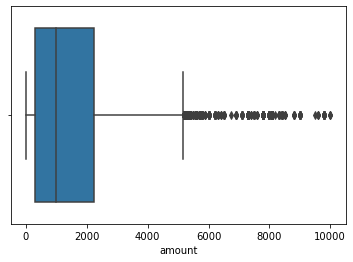

In [10]:
small_dollar_donors = sen_2016[(sen_2016['amount']<10_000)&(sen_2016['amount']>0)]['amount']
sns.boxplot(small_dollar_donors);

## Largest Number of Individual Donors

In [11]:
def num_donations(df):
    return df['candidate_name'].value_counts().sort_values(ascending=False).head(10)

In [12]:
num_donations(sen_2016)

John McCain          50312
Russ Feingold        43800
Charles E Schumer    40428
Marco Rubio          37653
Patty Murray         37362
Ted Cruz             32110
Pat Toomey           31136
Ron Wyden            28743
Rand Paul            26688
Lindsey Graham       24574
Name: candidate_name, dtype: int64

In [13]:
num_donations(sen_2014)

Mitch McConnell    152334
Mark Udall         105008
Mark Warner         89892
Jeanne Shaheen      81576
Mary L Landrieu     72621
Lindsey Graham      62271
Dick Durbin         55788
Ed Markey           54812
John Cornyn         51000
Kay R. Hagan        44490
Name: candidate_name, dtype: int64

In [14]:
num_donations(sen_2012)

Sherrod Brown         192742
Rick Santorum         185174
Elizabeth Warren      150824
Scott Brown           129095
Claire McCaskill      122353
Bill Nelson            92817
George Allen           83936
Kirsten Gillibrand     83584
Bob Kerrey             82782
Tammy Baldwin          80412
Name: candidate_name, dtype: int64

In [15]:
num_donations(sen_2010)

Barbara Boxer         339898
John McCain           203490
Russ Feingold         197040
Arlen Specter         172536
Harry Reid            162876
Patty Murray          147303
Pat Toomey            116136
Blanche Lincoln        96540
Kirsten Gillibrand     78928
Charles E Schumer      78597
Name: candidate_name, dtype: int64

## Total Raised Through Individual Contributions

In [16]:
def total_raised(df):
    return df.groupby(by='candidate_name')[['candidate_name', 'amount']].sum().sort_values(
                            by='amount', ascending=False).head(10)

In [17]:
total_raised(sen_2016)

,amount
candidate_name,
Charles E Schumer,72382905
John McCain,57073150
Ron Wyden,45559501
Russ Feingold,38217375
Marco Rubio,32777718
Lindsey Graham,31867176
Pat Toomey,31217704
Patty Murray,28470442
Ted Cruz,27976942


In [18]:
total_raised(sen_2014)

,amount
candidate_name,
Mitch McConnell,188592124
Mark Warner,94432563
Mark Udall,84155752
Mary L Landrieu,67592943
Lindsey Graham,59395336
John Cornyn,57526280
Jeanne Shaheen,56601808
Ed Markey,53058716
Dick Durbin,52950408


#### total_raised(sen_2012)

In [19]:
total_raised(sen_2010)

,amount
candidate_name,
Barbara Boxer,215778977
Harry Reid,191305590
Linda McMahon,159317952
John R Raese,156163634
Charles E Schumer,120675663
Patty Murray,92675219
Pat Toomey,88432616
Blanche Lincoln,87559665
Russ Feingold,85016415


## Donation timestamps?

In [20]:
def time_window(Series):
    return (min(Series).strftime("%b-%d-%Y"), max(Series).strftime("%b-%d-%Y"))

In [21]:
# Timeseries window for 2016 cycle donations ?
# Starts way too early and ends in July???
time_window(sen_2016['date_donated'])

('Jun-02-2011', 'Jul-26-2016')

In [22]:
# 2014 cycle has even more bad data
sorted(set([day.strftime("%b-%d-%Y") for day in sen_2014['date_donated'].sort_values().head(20)]))

['Dec-26-1926', 'May-30-1916', 'Oct-02-1918', 'Oct-03-1918', 'Sep-15-1955']